# Moondream Basic Tutorial

Moondream is a tiny vision language model with 1.86B parameters. 

In this basic tutorial we are going to load the model and test it in an image.

## Useful links
* [Moondream website](https://moondream.ai/)
* [Moondream repository](https://github.com/vikhyat/moondream)
* [Moondream demo](https://huggingface.co/spaces/vikhyatk/moondream2)

## Setup 🔧

In [ ]:
# Check the GPU
!nvidia-smi

Thu Mar  7 02:14:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%pip install transformers timm einops --quiet

from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

In [ ]:
model_id = "vikhyatk/moondream2"
revision = "2024-03-05"
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


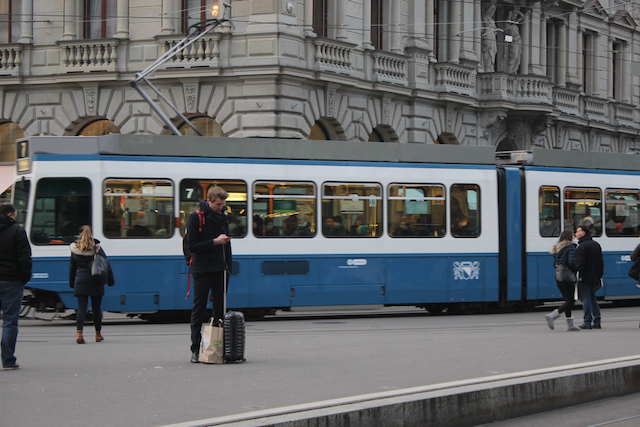

In [ ]:
image = Image.open('IMG_4121.png')
image

enc_image = model.encode_image(image)

In [ ]:
print(model.answer_question(enc_image, "Describe this image.", tokenizer))
print(model.answer_question(enc_image, "What color does the train have?", tokenizer))
print(model.answer_question(enc_image, "How many woman are in the picture?", tokenizer))


A group of people are gathered in this image, with a train present on the tracks. A building with windows is visible in the background, along with an electric pole and some wires.
Blue and white
2
